# Simple linear regression

TL;DR: statistical method to fit a linear equation to observed data.

_Regression_ is a statistical method that is used to determine the strength and the character of the relationship between one dependent variable and one or mode independent variables.

Simple linear regression is grounded in basic mathematical principles and is a form of statistical analysis. It's a way to model the relationship between two quantitative variables.

It is called `simple` because it examines the relationship between two variables only. When more than two variables are of interest, the analysis is called `multiple linear regression`.

At its core, it is the study of a linear relationship between the dependent and independent variables. This relationship is represented by a straight line (hence "linear").

In the context of machine learning, simple linear regression is a supervised learning algorithm used for predicting a continuous output variable based on one input variable.

A supervised learning algorithm is a type of machine learning algorithm that learns from labeled data. In supervised learning, the algorithm is trained on a labeled dataset, where the input data is accompanied by the correct output. The algorithm learns to map the input to the output based on the labeled examples. The goal of supervised learning is to learn a function that can accurately predict the output for new, unseen input data.

Simple linear regression is one of the basic algorithms taught to beginners in machine learning because of its simplicity and ease of understanding.

Simple linear regression can be represented as =>

![slp](slr_formula.png)

... where:

- `y` is the dependent variable (the one that we want to predict)
- `x` is the independent variable (the one that we use to make predictions)
- `β0` is the y-intercept
- `β1` is the slope
- `ϵ` is the error term, e.g. the difference between the observed value and the predicted value

In machine learning, the goal is often to adjust the parameters (e.g. `β0` and `β1`) to create a model that best fits the data. This is done by minimizing the error term (e.g. `ϵ`), using techniques like _gradient descent_.

Simple linear regression is widely used in the field of machine learning for prediction tasks.

The steps to perform a SLR are:

- define the dependent and independent variables, e.g. `y` and `x`; `x` should be the input that causes changes in the dependent variable `Y`
- determine the best-fit line: the goal is to find the "best" line that represents the relationship between the dependent and the independent variables, e.g. something that looks like:

    `y' = β1 * x + β0` => `y'` is the predicted value of `y` and `β0` is the y-intercept, e.g. the value of `y'` when `x` is 0

- you will then determine the quality of the fit using measures like _Mean Squared Error_

## practical example

Imagine you're trying to predict a person's weight based on their height. You gather data from many people and plot weight against height. You'll likely see a trend: taller people might generally weigh more than shorter people. If you draw a straight line through this scatter plot that best captures this trend, you've essentially performed simple linear regression.

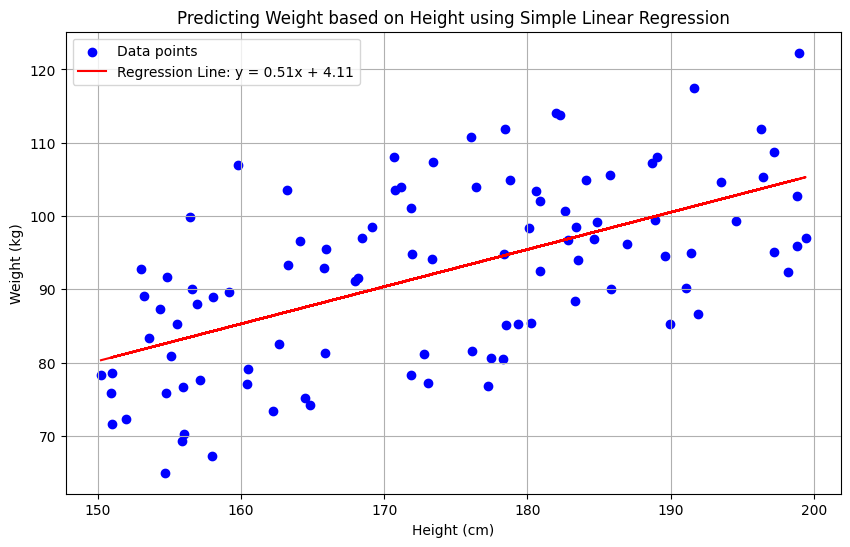

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate random data
np.random.seed(0)  # for reproducibility
heights = np.random.uniform(150, 200, 100)  # heights between 150 cm and 200 cm for 100 people
weights = heights * 0.52 + np.random.normal(0, 10, 100)  # weight as a function of height with some noise

# 2. Plot scatter plot of weight against height
plt.figure(figsize=(10, 6))
plt.scatter(heights, weights, color='blue', label='Data points')

# 3. fitting a straight line to our data
# here we're using a polynomial of degree 1 (a straight line);
# we're basically telling `numpy` to find the slope and intercept of the line that best fits our data,
# so that `y' = β1 * x + β0` is as close as possible to `y = β1 * x + β0`;
# this is done by minimizing the sum of squared differences between the actual and predicted values of `y`
slope, intercept = np.polyfit(heights, weights, 1)

# 4. Plot the regression line
predicted_weights = slope * heights + intercept
plt.plot(heights, predicted_weights, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Predicting Weight based on Height using Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


## Simple Linear Regression as part of Least Squares Regression

Simple Linear Regression is part of the _Least Squares Regression_ method.

It consists of fitting a line to data points in such a way that the sum of the squared differences (or _errors_) between the observed and the predicted values is minimized.

Imagine you have some data points on a graph. Now, place a ruler (representing a line) among these points. Move the ruler around. You'll see that for some positions of the ruler, the distance between the ruler and the points is smaller compared to other positions. The best position (or the best fit line) is the one where these distances (errors) are the smallest, and if you square these distances and add them all up, that sum is the least. That's why it's called "least squares"!

Now, how did we calculate the values of the slope and the y-intercept (`β1` and `β0`) in our previous example ?

### calculating the slope

The slope of the line is calculated as follows:

![slope formula](lsr_slope.png)

... where:

- the numerator is `n` times the sum of the products of each `x` and `y` minus the product of the sum of `x` values and the sum of `y` values
- the denominator is `n` times the sum of the squares of `x` values minus the square of the sum of `x` values

### calculating the y-intercept

The y-intercept is calculated as follows:

![y-intercept formula](lsr_y-intercept.png)

... where:

- the numerator is the sum of all `y` values minus the product of the slope from the previous formula and the sum of all `x` values
- the denominator is `n`, e.g. the number of data points